# Classification Accuracy 

In [10]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from time import time

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("uadata_cleaned.csv", index_col = 0)

In [12]:
df.groupby('airportdelays>=20percent').describe().tot_arr_delay_mins

,count,mean,std,min,25%,50%,75%,max
airportdelays>=20percent,,,,,,,,
0,7750.0,4811.513290,11711.179342,0.0,369.0,1049.0,3286.0,151727.0
1,8273.0,7781.713163,19458.920281,15.0,965.0,2309.0,6061.0,260512.0


In [13]:
#Highly corr variables: need to take out '%on_time','%delay_aircarrier','%delay_weather','%delay_nas','%delay_sec','%delay_lateaircraft','%cancelled','%diverted'
df = df.drop(columns=['%on_time','%delay_aircarrier','%delay_weather','%delay_nas','%delay_sec','%delay_lateaircraft','%cancelled','%diverted','delaymins>=10000', 'Unnamed: 0.1'])

#set the outcome
df_outcome = df['airportdelays>=20percent']

#target or prediction
df['target_delayed'] = df['airportdelays>=20percent']
df_pred = df
list(df_pred.columns)

['airportdelays>=20percent',
 'year',
 'month',
 'total_arrival_flights',
 'tot_arr_delay_mins',
 'carrier_delay_mins',
 'weather_delay_mins',
 'nas_delay_mins',
 'security_delay_mins',
 'lateaircraft_delay_mins',
 'AGS',
 'ALB',
 'ANC',
 'ATL',
 'AUS',
 'AVL',
 'BDL',
 'BGR',
 'BHM',
 'BIL',
 'BNA',
 'BOI',
 'BOS',
 'BQN',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CHS',
 'CID',
 'CLE',
 'CLT',
 'CMH',
 'COS',
 'CRP',
 'CVG',
 'DAY',
 'DCA',
 'DEN',
 'DFW',
 'DLH',
 'DSM',
 'DTW',
 'EGE',
 'ELP',
 'EUG',
 'EWR',
 'FAI',
 'FAT',
 'FCA',
 'FLL',
 'FSD',
 'GEG',
 'GRR',
 'GSO',
 'GSP',
 'GUC',
 'GUM',
 'HDN',
 'HNL',
 'IAD',
 'IAH',
 'ICT',
 'IDA',
 'IND',
 'ITO',
 'JAC',
 'JAX',
 'JFK',
 'KOA',
 'LAS',
 'LAX',
 'LGA',
 'LIH',
 'MAF',
 'MCI',
 'MCO',
 'MDT',
 'MDW',
 'MEM',
 'MFE',
 'MFR',
 'MHT',
 'MIA',
 'MKE',
 'MSN',
 'MSO',
 'MSP',
 'MSY',
 'MTJ',
 'MYR',
 'OAK',
 'OGG',
 'OKC',
 'OMA',
 'ONT',
 'ORD',
 'ORF',
 'PBI',
 'PDX',
 'PHL',
 'PHX',
 'PIT',
 'PNS',
 'PSP',
 'PVD',
 '

Target Variable
target_delayed
0    7750
1    8273
Name: target_delayed, dtype: int64


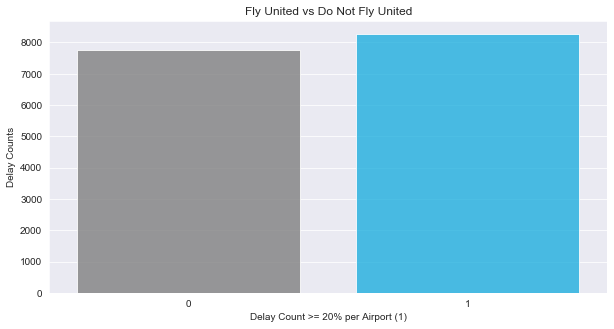

In [14]:
#Delayed Count
print('Target Variable')
print(df.groupby(['target_delayed']).target_delayed.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['airportdelays>=20percent'], alpha =.80, palette= ['gray', 'deepskyblue'])
plt.title('Fly United vs Do Not Fly United')
plt.xlabel('Delay Count >= 20% per Airport (1)')
plt.ylabel('Delay Counts')
plt.show()

you can see how 0 and 1 (target) is evenly distributed

# Now we will analyze minute delays 

Continuous Variables
                           count         mean           std  min    25%  \
total_arrival_flights    16023.0   502.242339   1159.197257  1.0   58.0   
tot_arr_delay_mins       16023.0  6345.087749  16248.982242  0.0  605.0   
carrier_delay_mins       16023.0  1638.676777   3702.515469  0.0  166.0   
weather_delay_mins       16023.0   239.962429    682.297520  0.0    0.0   
nas_delay_mins           16023.0  1904.750296   7173.905878  0.0   75.0   
security_delay_mins      16023.0     2.576047     25.889305  0.0    0.0   
lateaircraft_delay_mins  16023.0  2559.122199   5923.270481  0.0  260.0   

                            50%     75%       max  
total_arrival_flights     127.0   385.0   11055.0  
tot_arr_delay_mins       1650.0  4673.5  260512.0  
carrier_delay_mins        473.0  1290.5   40363.0  
weather_delay_mins         42.0   191.0   24442.0  
nas_delay_mins            251.0   923.0  188994.0  
security_delay_mins         0.0     0.0    1161.0  
lateaircraft_d

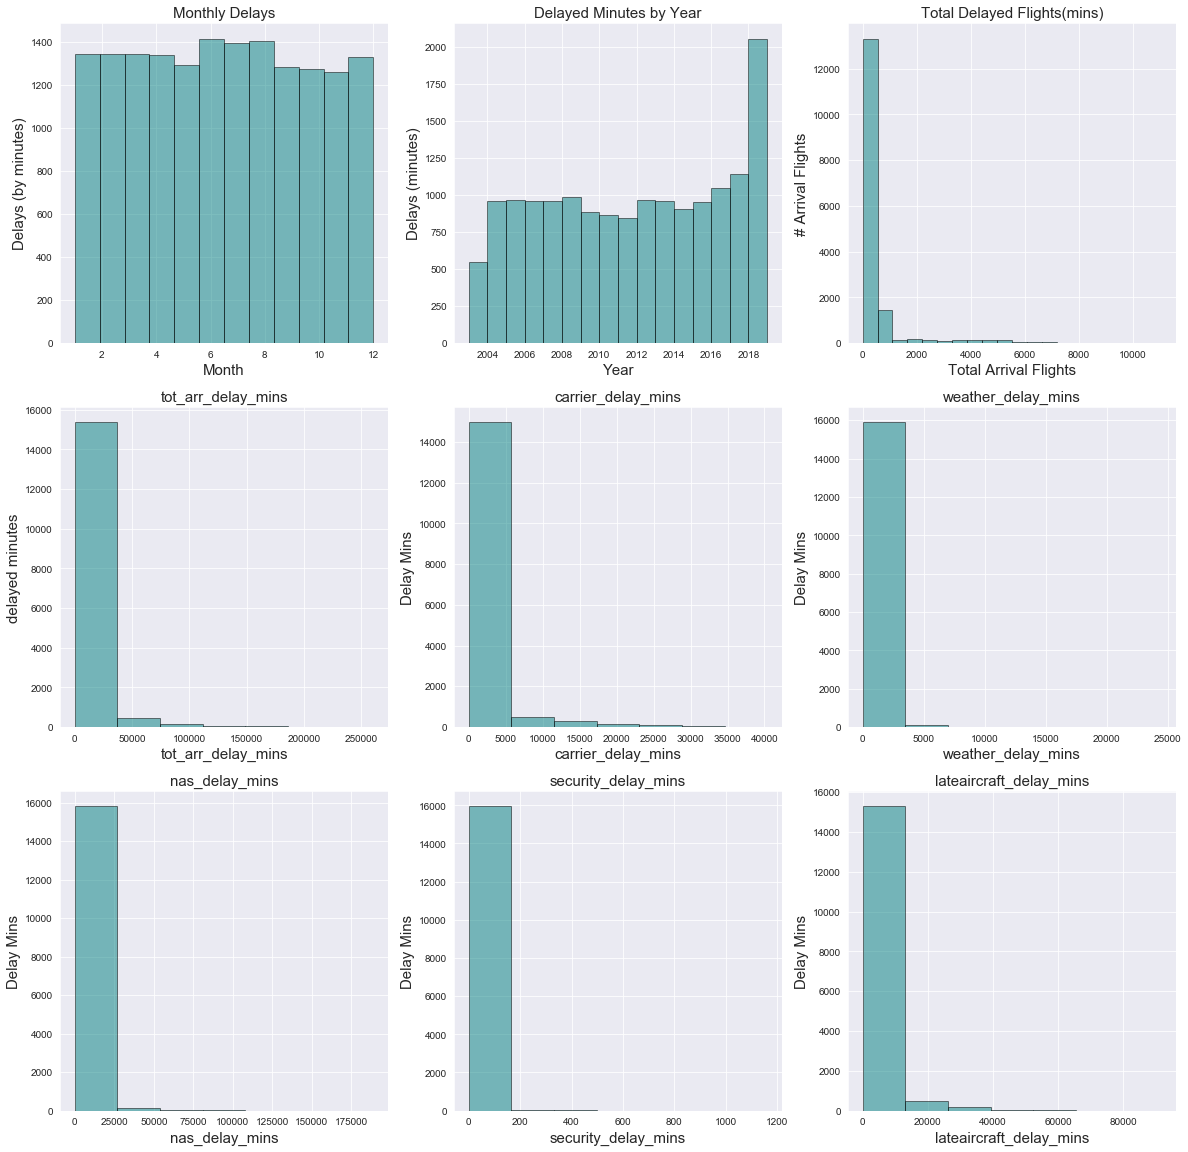

In [15]:
# Identify numeric features
print('Continuous Variables')
print(df[['total_arrival_flights','tot_arr_delay_mins','carrier_delay_mins','weather_delay_mins','nas_delay_mins','security_delay_mins','lateaircraft_delay_mins']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(df.groupby('month').month.count())
print(df.groupby('year').year.count())


# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace = .20)

ax1 = fig.add_subplot(331)
ax1.hist(df['month'], bins = 12, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Month', fontsize = 15)
ax1.set_ylabel('Delays (by minutes)',fontsize = 15)
ax1.set_title('Monthly Delays',fontsize = 15)

ax2 = fig.add_subplot(332)
ax2.hist(df['year'], bins = 16, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Year',fontsize = 15)
ax2.set_ylabel('Delays (minutes)',fontsize = 15)
ax2.set_title('Delayed Minutes by Year',fontsize = 15)

ax3 = fig.add_subplot(333)
ax3.hist(df['total_arrival_flights'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Total Arrival Flights',fontsize = 15)
ax3.set_ylabel('# Arrival Flights',fontsize = 15)
ax3.set_title('Total Delayed Flights(mins)',fontsize = 15)

ax4 = fig.add_subplot(334)
ax4.hist(df['tot_arr_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('tot_arr_delay_mins',fontsize = 15)
ax4.set_ylabel('delayed minutes',fontsize = 15)
ax4.set_title('tot_arr_delay_mins',fontsize = 15)

ax5 = fig.add_subplot(335)
ax5.hist(df['carrier_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('carrier_delay_mins',fontsize = 15)
ax5.set_ylabel('Delay Mins',fontsize = 15)
ax5.set_title('carrier_delay_mins',fontsize = 15)

ax6 = fig.add_subplot(336)
ax6.hist(df['weather_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax6.set_xlabel('weather_delay_mins',fontsize = 15)
ax6.set_ylabel('Delay Mins',fontsize = 15)
ax6.set_title('weather_delay_mins',fontsize = 15)

ax7 = fig.add_subplot(337)
ax7.hist(df['nas_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax7.set_xlabel('nas_delay_mins',fontsize = 15)
ax7.set_ylabel('Delay Mins',fontsize = 15)
ax7.set_title('nas_delay_mins',fontsize = 15)

ax8 = fig.add_subplot(338)
ax8.hist(df['security_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax8.set_xlabel('security_delay_mins',fontsize = 15)
ax8.set_ylabel('Delay Mins',fontsize = 15)
ax8.set_title('security_delay_mins',fontsize = 15)

ax9 = fig.add_subplot(339)
ax9.hist(df['lateaircraft_delay_mins'], bins = 7, alpha = .50,edgecolor= 'black',color ='teal')
ax9.set_xlabel('lateaircraft_delay_mins',fontsize = 15)
ax9.set_ylabel('Delay Mins',fontsize = 15)
ax9.set_title('lateaircraft_delay_mins',fontsize = 15)

plt.show()

# our target variable based by month... 
- we can see how June and July have a lot of delays within airports

Delay Summary


target_delayed    0     1
month                    
1               611   732
2               676   668
3               690   652
4               815   525
5               593   700
6               314  1101
7               332  1063
8               526   876
9               943   342
10              922   351
11              846   414
12              482   849


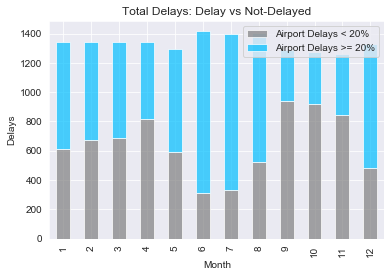

In [310]:
#summary
print('Delay Summary')
print('\n')
print(df.groupby(['month','target_delayed']).month.count().unstack())
#visualization
month = df.groupby(['month','target_delayed']).month.count().unstack()
p1  = month.plot(kind = 'bar', stacked = True, 
                   title = 'Total Delays: Delay vs Not-Delayed', 
                   color = ['grey','deepskyblue'], alpha = .70)

p1.set_xlabel('Month')
p1.set_ylabel('Delays')
p1.legend(['Airport Delays < 20%','Airport Delays >= 20%'])
plt.show()

# another Visualization:

Statistical Summary of Total delayed minutes, carrier delay minutes, weather delay minutes, nas delay minutes, security delay minutes and late arrivals


Was not Delayed
                          count         mean           std  min     25%  \
total_arrival_flights    7750.0   550.013548   1230.706362  1.0   57.00   
tot_arr_delay_mins       7750.0  4811.513290  11711.179342  0.0  369.00   
carrier_delay_mins       7750.0  1409.070581   3201.809055  0.0  103.00   
weather_delay_mins       7750.0   184.724774    574.137612  0.0    0.00   
nas_delay_mins           7750.0  1229.816903   4149.392424  0.0   43.00   
security_delay_mins      7750.0     3.067226     30.447062  0.0    0.00   
lateaircraft_delay_mins  7750.0  1984.833806   4582.333710  0.0  146.25   

                            50%      75%       max  
total_arrival_flights     126.0   395.00   11055.0  
tot_arr_delay_mins       1049.0  3286.00  151727.0  
carrier_delay_mins        336.0  1015.75   29576.0  
weather_delay_min

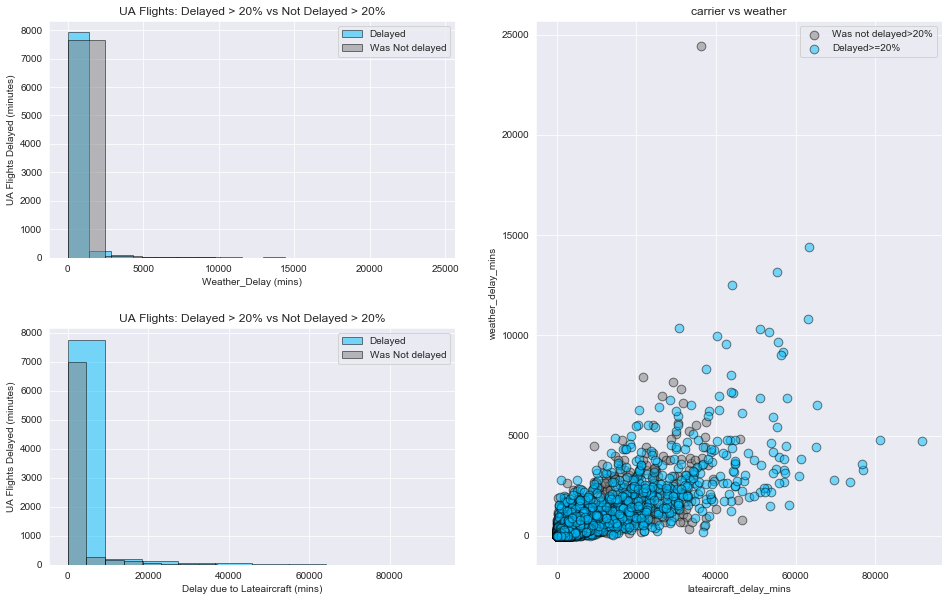

In [16]:
# Statistical summary of continuous variables 
print('Statistical Summary of Total delayed minutes, carrier delay minutes, weather delay minutes, nas delay minutes, security delay minutes and late arrivals')
print('\n')
print('Was not Delayed')
print(df[df['target_delayed']==0][['total_arrival_flights','tot_arr_delay_mins','carrier_delay_mins','weather_delay_mins','nas_delay_mins','security_delay_mins','lateaircraft_delay_mins']].describe().transpose())
print('--'*40)
print('Survived')
print(df[df['target_delayed']==1][['total_arrival_flights','tot_arr_delay_mins','carrier_delay_mins','weather_delay_mins','nas_delay_mins','security_delay_mins','lateaircraft_delay_mins']].describe().transpose())

print('\n')
print('-------------------------------------------')
print('Plotting Weather Delay Minutes vs Late Aircraft Minutes')
print('-------------------------------------------')
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['target_delayed']==1].weather_delay_mins, bins = 10, label = 'Delayed', alpha = .50, edgecolor = 'black',color = 'deepskyblue')
ax1.hist(df[df['target_delayed']==0].weather_delay_mins, bins = 10, label ='Was Not delayed', alpha = .50,edgecolor= 'black',color ='grey')
ax1.set_title('UA Flights: Delayed > 20% vs Not Delayed > 20%')
ax1.set_xlabel('Weather_Delay (mins)')
ax1.set_ylabel('UA Flights Delayed (minutes)')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(df[df['target_delayed']==1].lateaircraft_delay_mins, bins = 10, label = 'Delayed', alpha = .50, edgecolor = 'black',color = 'deepskyblue')
ax2.hist(df[df['target_delayed']==0].lateaircraft_delay_mins, bins = 10, label ='Was Not delayed', alpha = .50,edgecolor= 'black',color ='grey')
ax2.set_title('UA Flights: Delayed > 20% vs Not Delayed > 20%')
ax2.set_xlabel('Delay due to Lateaircraft (mins)')
ax2.set_ylabel('UA Flights Delayed (minutes)')
ax2.legend(loc = 'upper right')


ax3 = fig.add_subplot(122)
ax3.scatter(x = df[df['target_delayed']==0].lateaircraft_delay_mins, y = df[df['target_delayed']==0].weather_delay_mins,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Was not delayed>20%')
ax3.scatter(x = df[df['target_delayed']==1].lateaircraft_delay_mins, y = df[df['target_delayed']==1].weather_delay_mins,
                        alpha = .50,edgecolors= 'black',  c = 'deepskyblue', s= 75, label = 'Delayed>=20%')
ax3.set_xlabel('lateaircraft_delay_mins')
ax3.set_ylabel('weather_delay_mins')
ax3.set_title('carrier vs weather')
ax3.legend()

plt.show()

# Make month and year dummy variables before modeling 

In [14]:
df.head()

,airportdelays>=20percent,year,month,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,...,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS,target_delayed
0,0,2003,6,150.0,1416.0,349.0,266.0,105.0,0.0,696.0,...,0,0,0,0,0,0,0,0,0,0
1,0,2003,6,90.0,652.0,71.0,0.0,130.0,0.0,451.0,...,0,0,0,0,0,0,0,0,0,0
2,0,2003,6,130.0,1049.0,343.0,47.0,426.0,0.0,233.0,...,0,0,0,0,0,0,0,0,0,0
3,1,2003,6,365.0,3935.0,461.0,240.0,1643.0,0.0,1591.0,...,0,0,0,0,0,0,0,0,0,1
4,0,2003,6,60.0,427.0,93.0,56.0,219.0,0.0,59.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
month_dummies = pd.get_dummies(df['month'], prefix='month', drop_first=True)
year_dummies = pd.get_dummies(df['year'], prefix='year', drop_first=True)

In [26]:
df = df.drop(['month','year'], axis=1)

In [27]:
df = pd.concat([df, month_dummies, year_dummies], axis=1)

In [28]:
df.head()

,total_arrival_flights,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,AGS,ALB,ANC,ATL,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,150.0,349.0,266.0,105.0,0.0,696.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.0,71.0,0.0,130.0,0.0,451.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130.0,343.0,47.0,426.0,0.0,233.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,365.0,461.0,240.0,1643.0,0.0,1591.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,60.0,93.0,56.0,219.0,0.0,59.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
list(df.columns)

['total_arrival_flights',
 'carrier_delay_mins',
 'weather_delay_mins',
 'nas_delay_mins',
 'security_delay_mins',
 'lateaircraft_delay_mins',
 'AGS',
 'ALB',
 'ANC',
 'ATL',
 'AUS',
 'AVL',
 'BDL',
 'BGR',
 'BHM',
 'BIL',
 'BNA',
 'BOI',
 'BOS',
 'BQN',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CHS',
 'CID',
 'CLE',
 'CLT',
 'CMH',
 'COS',
 'CRP',
 'CVG',
 'DAY',
 'DCA',
 'DEN',
 'DFW',
 'DLH',
 'DSM',
 'DTW',
 'EGE',
 'ELP',
 'EUG',
 'EWR',
 'FAI',
 'FAT',
 'FCA',
 'FLL',
 'FSD',
 'GEG',
 'GRR',
 'GSO',
 'GSP',
 'GUC',
 'GUM',
 'HDN',
 'HNL',
 'IAD',
 'IAH',
 'ICT',
 'IDA',
 'IND',
 'ITO',
 'JAC',
 'JAX',
 'JFK',
 'KOA',
 'LAS',
 'LAX',
 'LGA',
 'LIH',
 'MAF',
 'MCI',
 'MCO',
 'MDT',
 'MDW',
 'MEM',
 'MFE',
 'MFR',
 'MHT',
 'MIA',
 'MKE',
 'MSN',
 'MSO',
 'MSP',
 'MSY',
 'MTJ',
 'MYR',
 'OAK',
 'OGG',
 'OKC',
 'OMA',
 'ONT',
 'ORD',
 'ORF',
 'PBI',
 'PDX',
 'PHL',
 'PHX',
 'PIT',
 'PNS',
 'PSP',
 'PVD',
 'PWM',
 'RAP',
 'RDM',
 'RDU',
 'RIC',
 'RNO',
 'ROC',
 'RSW',
 'SAN',
 

In [30]:
df.to_csv("UA_clean_data.csv")

# Modeling 

In [31]:
df = pd.read_csv("UA_clean_data.csv")

In [33]:
df = df.drop(columns=['Unnamed: 0'])

In [34]:
#creating matrix of features 
X = df.drop('target_delayed', axis = 1)
#assigning target variable 
y = df['target_delayed']
#creating a list of features
feature_cols = X.columns

In [35]:
X.head()

,total_arrival_flights,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,AGS,ALB,ANC,ATL,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,150.0,349.0,266.0,105.0,0.0,696.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90.0,71.0,0.0,130.0,0.0,451.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,130.0,343.0,47.0,426.0,0.0,233.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,365.0,461.0,240.0,1643.0,0.0,1591.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,60.0,93.0,56.0,219.0,0.0,59.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TEST TRAIN SPLIT

In [36]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25,random_state=42)

In [37]:
import warnings
warnings.filterwarnings("ignore") 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))

In [39]:
dictionary

{'total_arrival_flights': -0.018044673895581582,
 'carrier_delay_mins': 0.0018063536976878527,
 'weather_delay_mins': -0.000926799574690691,
 'nas_delay_mins': 0.0014854890720678957,
 'security_delay_mins': 0.00197834866736821,
 'lateaircraft_delay_mins': 0.0014541041830751496,
 'AGS': 0.10079169536769265,
 'ALB': 0.36306090461628643,
 'ANC': 0.276888638555842,
 'ATL': 0.604137170767634,
 'AUS': -0.36921607802033524,
 'AVL': 0.10551950354288663,
 'BDL': 0.1184678782007136,
 'BGR': -0.08834007195549193,
 'BHM': -0.005248912422084091,
 'BIL': -0.18426678725139167,
 'BNA': 0.06503115905986058,
 'BOI': -0.2242778629511666,
 'BOS': 0.04213735352209844,
 'BQN': 0.8523791774192409,
 'BTR': -0.010624357534520483,
 'BTV': 0.3957453618027781,
 'BUF': 0.35536585157351624,
 'BUR': -0.5211417774826037,
 'BWI': -0.029728787094405257,
 'BZN': -0.10774230873035812,
 'CHS': -0.34122005352838336,
 'CID': -0.12997503069952732,
 'CLE': -0.17438837483812322,
 'CLT': -0.14164767588094596,
 'CMH': -0.0699834

In [40]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

# Classification Accuracy 

In [41]:
# calculate accuracy
# establish a baseline ..... dummy classifier or use on tuned niave model 
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8429855217174239


# Null Accuracy 

In [42]:
y_test.value_counts()

1    2049
0    1957
Name: target_delayed, dtype: int64

In [43]:
# calculate the percentage of ones
y_test.mean()

0.5114827758362457

In [44]:
# calculate the percentage of zeros
1 - y_test.mean()

0.4885172241637543

In [45]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.5114827758362457

- Compare the True and predicted response values


In [46]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1]
Pred: [1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1]


Conclusion:
- Classification accuracy is the easiest classification metric to understand
- it does not tell you the underlying distribution of response values
- it does not tell you what "types" of errors your classifier is making

# Confusion Matrix

Table that describes the performance of a classification model

In [47]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1642  315]
 [ 314 1735]]


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Delayed<20%', 'Delayed>=20%']

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[1642  315]
 [ 314 1735]]


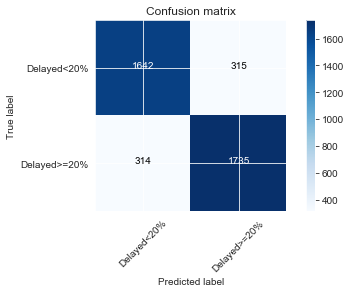

In [50]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [51]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1]
Pred: [1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1]


In [52]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix

In [53]:
# Specificity 
print(TN / float(TN + FP))

0.8390393459376597


In [54]:
# False Positive Rate - When the actual value is negative, how often is the prediction incorrect?

print(FP / float(TN + FP))

0.1609606540623403


In [55]:
THRESHOLD = 0.5
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.842986
recall,0.846755
precision,0.846341
F1,0.846548


In [56]:
THRESHOLD = 0.75
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), metrics.recall_score(y_test, preds),
                   metrics.precision_score(y_test, preds), metrics.f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.783824
recall,0.608590
precision,0.951182
F1,0.742262


In [57]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [58]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[3.02268873e-02, 9.69773113e-01],
       [8.16106071e-02, 9.18389393e-01],
       [2.36651818e-01, 7.63348182e-01],
       [4.18228205e-02, 9.58177180e-01],
       [9.92444311e-01, 7.55568868e-03],
       [2.74596692e-01, 7.25403308e-01],
       [7.64025289e-01, 2.35974711e-01],
       [7.80960615e-01, 2.19039385e-01],
       [1.00000000e+00, 1.56539891e-12],
       [9.92432038e-01, 7.56796155e-03]])

In [59]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([9.69773113e-01, 9.18389393e-01, 7.63348182e-01, 9.58177180e-01,
       7.55568868e-03, 7.25403308e-01, 2.35974711e-01, 2.19039385e-01,
       1.56539891e-12, 7.56796155e-03])

In [60]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

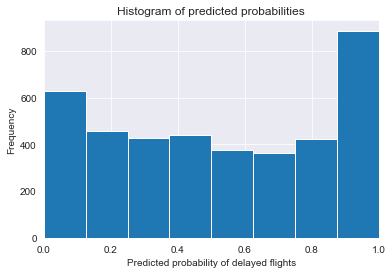

In [61]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of delayed flights')
plt.ylabel('Frequency')

In [62]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [63]:
y_pred_prob[0:10]

array([9.69773113e-01, 9.18389393e-01, 7.63348182e-01, 9.58177180e-01,
       7.55568868e-03, 7.25403308e-01, 2.35974711e-01, 2.19039385e-01,
       1.56539891e-12, 7.56796155e-03])

In [64]:
y_pred_class[0:10]

array([1., 1., 1., 1., 0., 1., 0., 0., 0., 0.])

In [65]:
print(confusion)

[[1642  315]
 [ 314 1735]]


In [66]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1153  804]
 [  92 1957]]


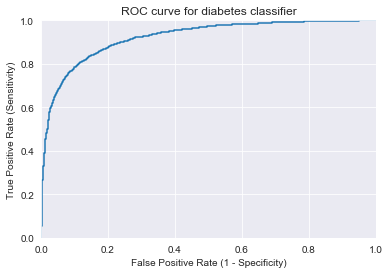

In [67]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [68]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [69]:
evaluate_threshold(0.5)

Sensitivity: 0.846754514397267
Specificity: 0.8390393459376597


In [70]:
evaluate_threshold(0.3)

Sensitivity: 0.9551000488042948
Specificity: 0.5891670924885029


# ROC_AUC Score

In [71]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9218704838258778


In [72]:
import warnings
warnings.filterwarnings("ignore")

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.6958470796001928

- **AUC** is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
- AUC is **classification-threshold-invariant**. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

# KNN

# **Standardization - Scaling Data with StandardScaler

# run first cell here before modeling 

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [74]:
from sklearn.metrics import f1_score
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score(y_test, y_predict, average='weighted')

0.6249478600855619

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_predict, labels=None, sample_weight=None))
print(classification_report(y_test, y_predict))

[[1138  807]
 [ 693 1368]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      1945
           1       0.63      0.66      0.65      2061

    accuracy                           0.63      4006
   macro avg       0.63      0.62      0.62      4006
weighted avg       0.63      0.63      0.62      4006



In [76]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6249478600855619, 0.6260958904350503, 0.6600583776417307, 0.6777262308458954, 0.6688206144848265, 0.6721828772865378, 0.6686875709214515, 0.6786574327188534, 0.6922338496685846, 0.6830672385980457]


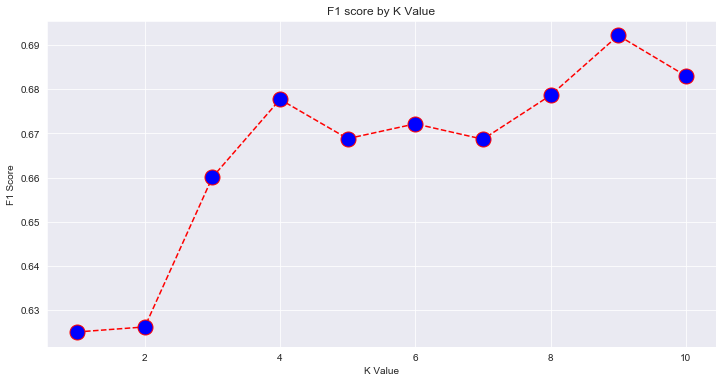

In [77]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=15)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# Classification Decision Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier


In [87]:
ctree=DecisionTreeClassifier(max_depth = 10)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.636092 to fit



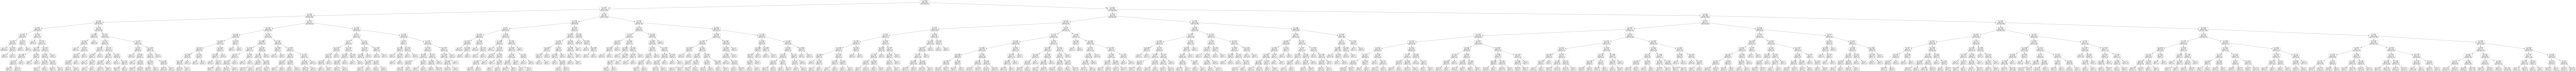

In [88]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [89]:
clasPred = ctree.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, clasPred)

0.8397403894158761

[0.6077523183357048, 0.5322217315691631, 0.5437642279651993, 0.5727905230751018, 0.6141047957053061, 0.6209077003714166, 0.6318336094230309, 0.6441266492368009, 0.6617866157633588]


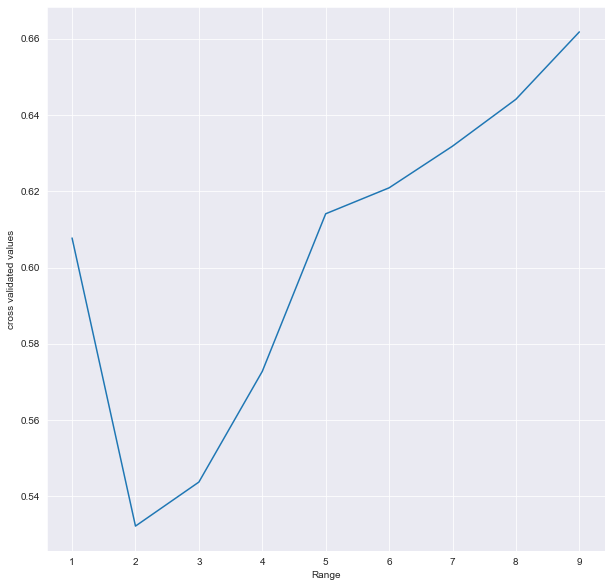

In [91]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ctree, X, y, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X, y, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('Range')
plt.ylabel('cross validated values')
plt.show()

# Random Forest Model 

In [92]:
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

target = df['target_delayed']
df.drop("target_delayed", axis=1, inplace=True)

In [93]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=1)
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [94]:
print(clf.feature_importances_)

[7.79314440e-02 9.93597003e-02 7.52456295e-02 9.82741062e-02
 2.35706850e-03 1.38878143e-01 2.13124203e-04 9.50379801e-04
 4.61644478e-04 5.93252914e-04 2.68653590e-04 1.37162944e-04
 2.97523704e-04 1.18429597e-04 3.60483714e-05 8.42197149e-04
 2.40412120e-04 3.27222773e-04 1.67225820e-04 3.46286346e-03
 2.09824700e-04 2.01125563e-03 7.38839331e-04 5.59569046e-04
 2.75716500e-04 2.54517203e-04 2.47644306e-04 4.96784796e-05
 5.15119428e-04 4.43101690e-04 2.95829657e-04 1.64629459e-04
 4.93458856e-05 5.56358001e-04 3.02388673e-04 5.60110257e-04
 7.19934856e-03 8.37373926e-05 8.71868557e-05 3.08509375e-04
 2.85601731e-04 2.95673329e-04 1.43413479e-04 2.72127843e-04
 1.97904572e-03 2.85203347e-04 2.94243772e-04 6.38157911e-05
 2.79217542e-04 5.12993004e-04 4.60557193e-04 1.01236744e-03
 1.60298747e-04 0.00000000e+00 5.42920462e-04 1.13159978e-03
 1.14126840e-04 1.66669870e-03 4.14652269e-03 3.56669346e-04
 2.58876178e-04 0.00000000e+00 3.79274215e-04 6.05830544e-04
 4.84314564e-04 3.093962

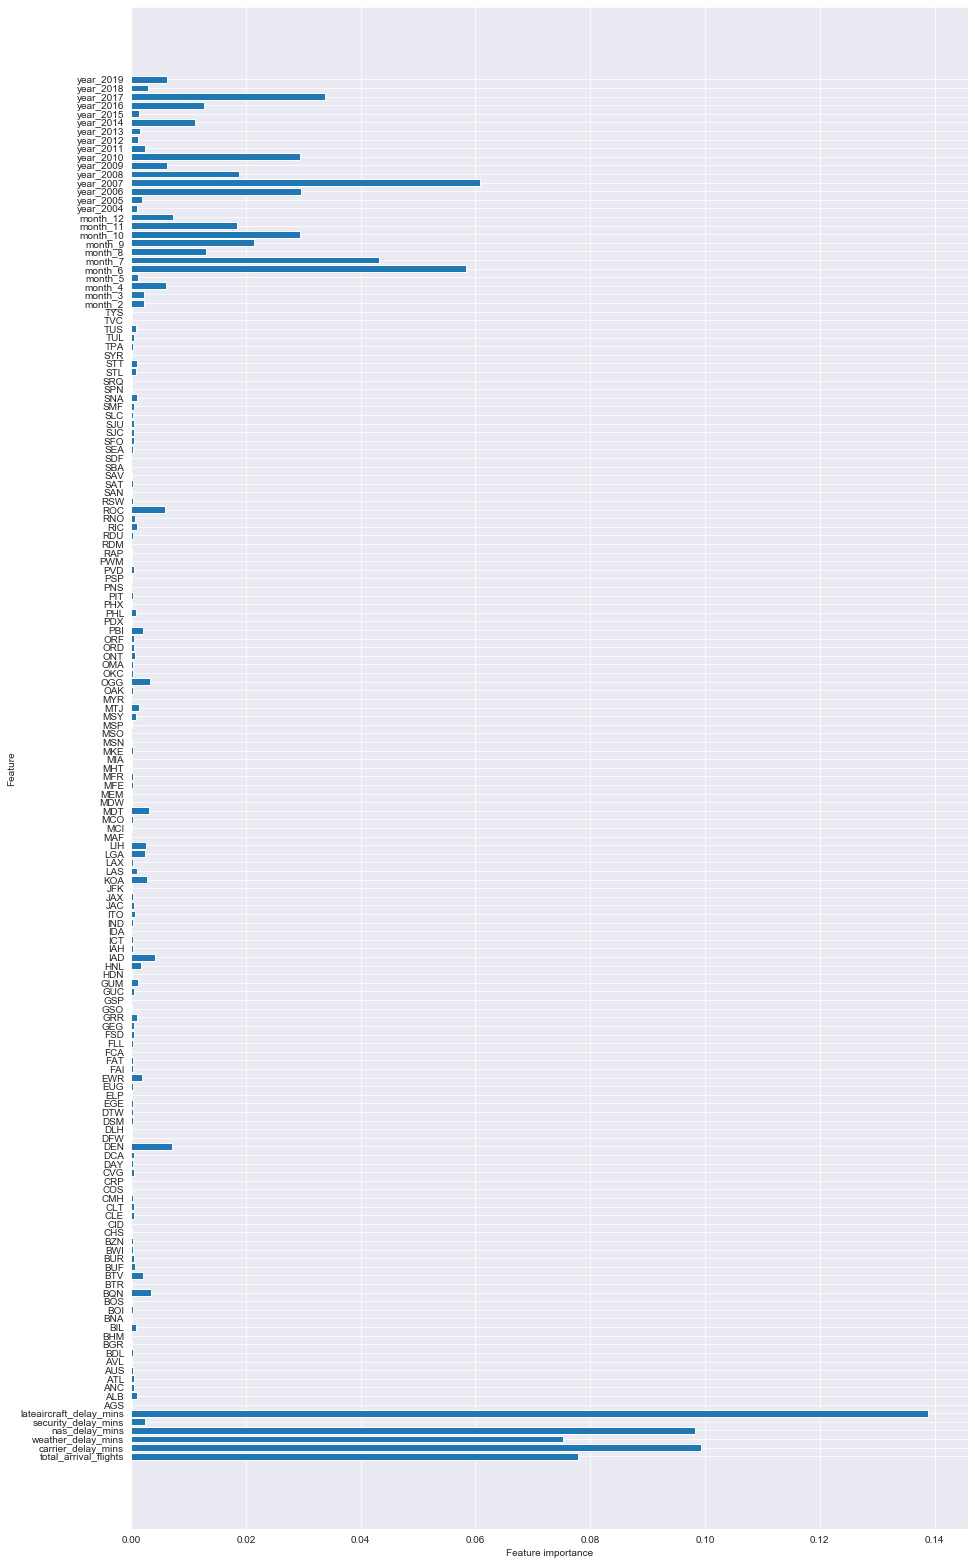

In [98]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,28))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(clf)

In [99]:
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1327  618]
 [ 358 1703]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1945
           1       0.73      0.83      0.78      2061

    accuracy                           0.76      4006
   macro avg       0.76      0.75      0.75      4006
weighted avg       0.76      0.76      0.75      4006



In [100]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 75.64%


# Bagged Trees 

In [101]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=10), n_estimators=20)

In [102]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [103]:
bagged_tree.score(X_train, y_train)

0.9423316967629192

In [104]:
bagged_tree.score(X_test, y_test)

0.8739390913629556

# Base model = Forest

**Fitting a random forests model**

In [105]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
forest.score(X_train, y_train)

0.8106016476658068

In [107]:
forest.score(X_test, y_test)

0.7805791313030455

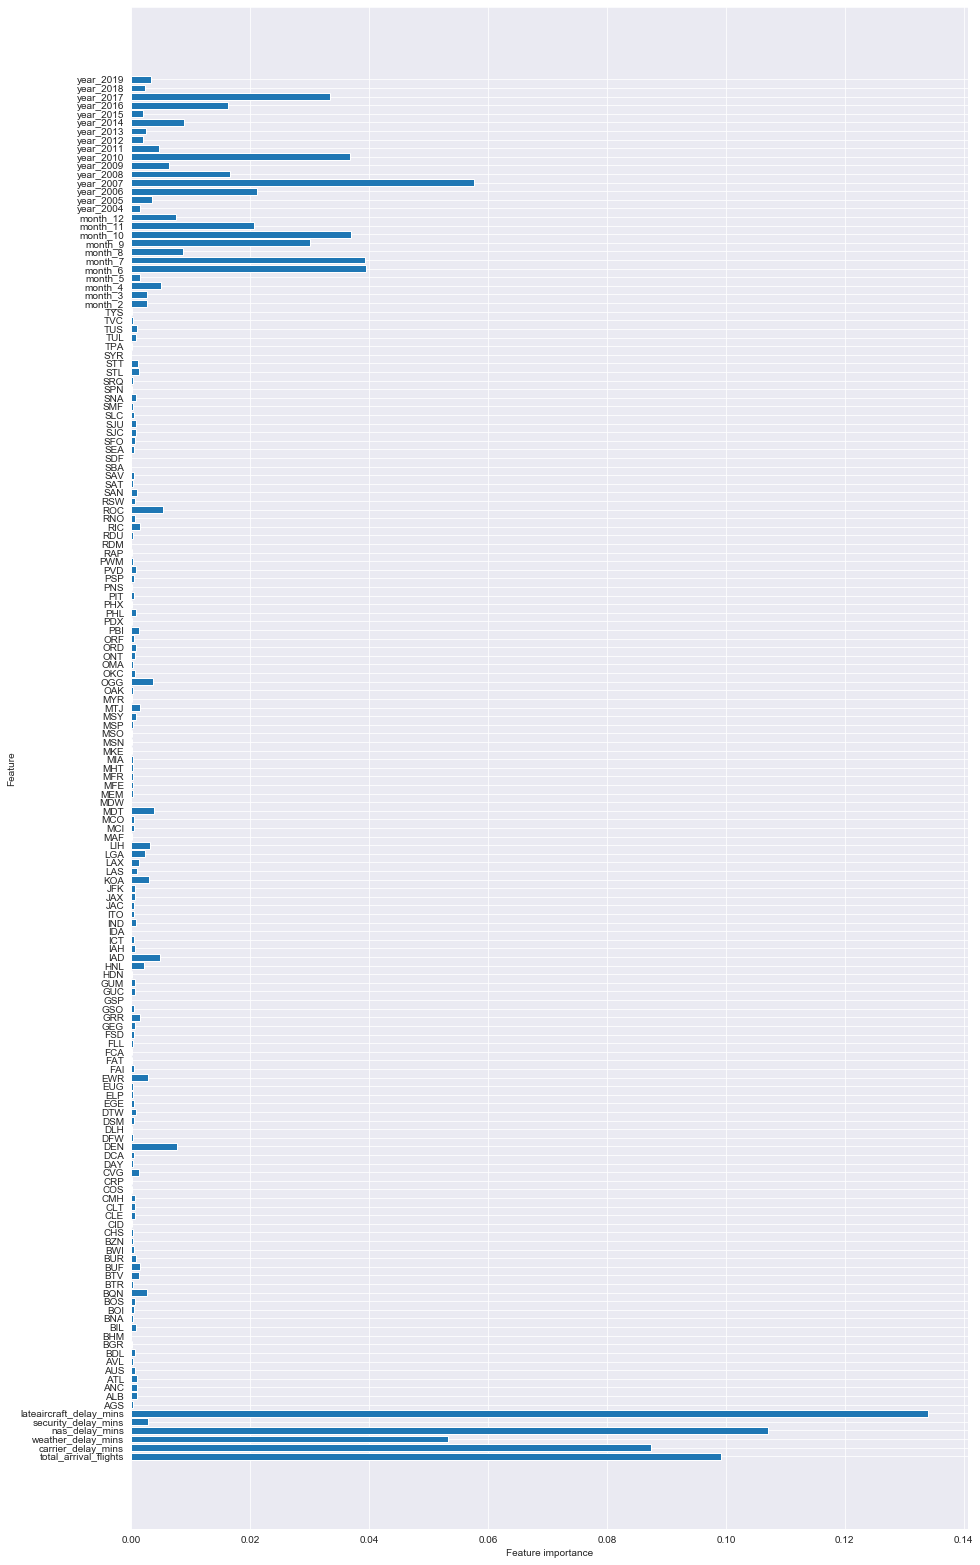

In [108]:
plot_feature_importances(forest)

**Look at the trees in your forest**

In [109]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 100, max_depth= 10)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
rf_tree_1 = forest_2.estimators_[0]

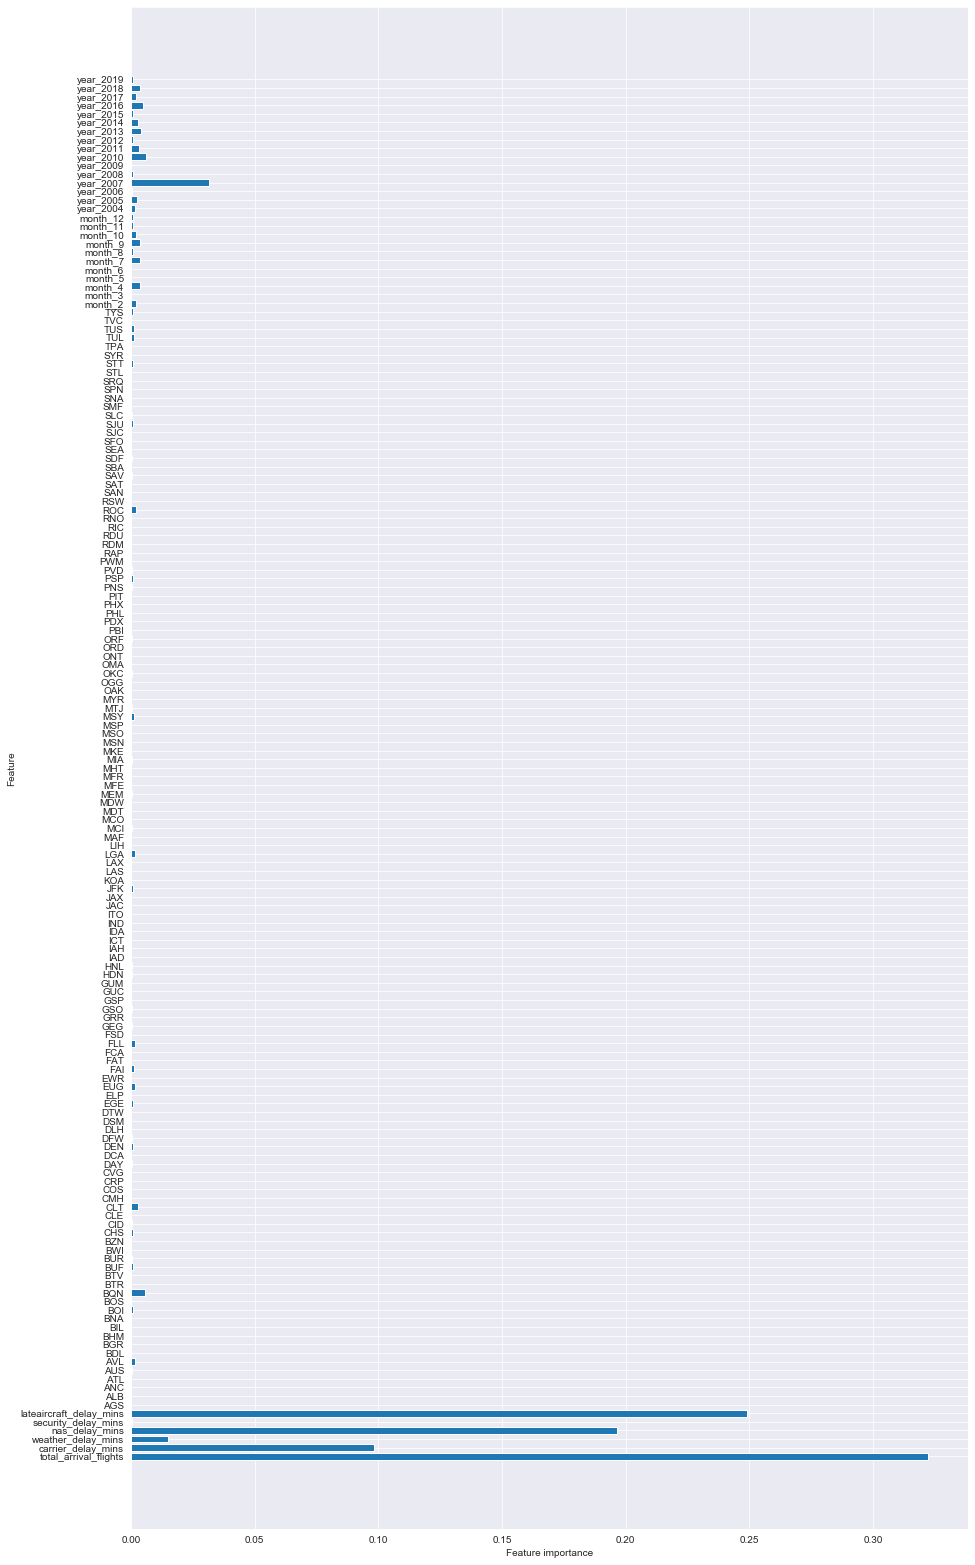

In [111]:
plot_feature_importances(rf_tree_1)

In [112]:
rf_tree_2 = forest_2.estimators_[1]

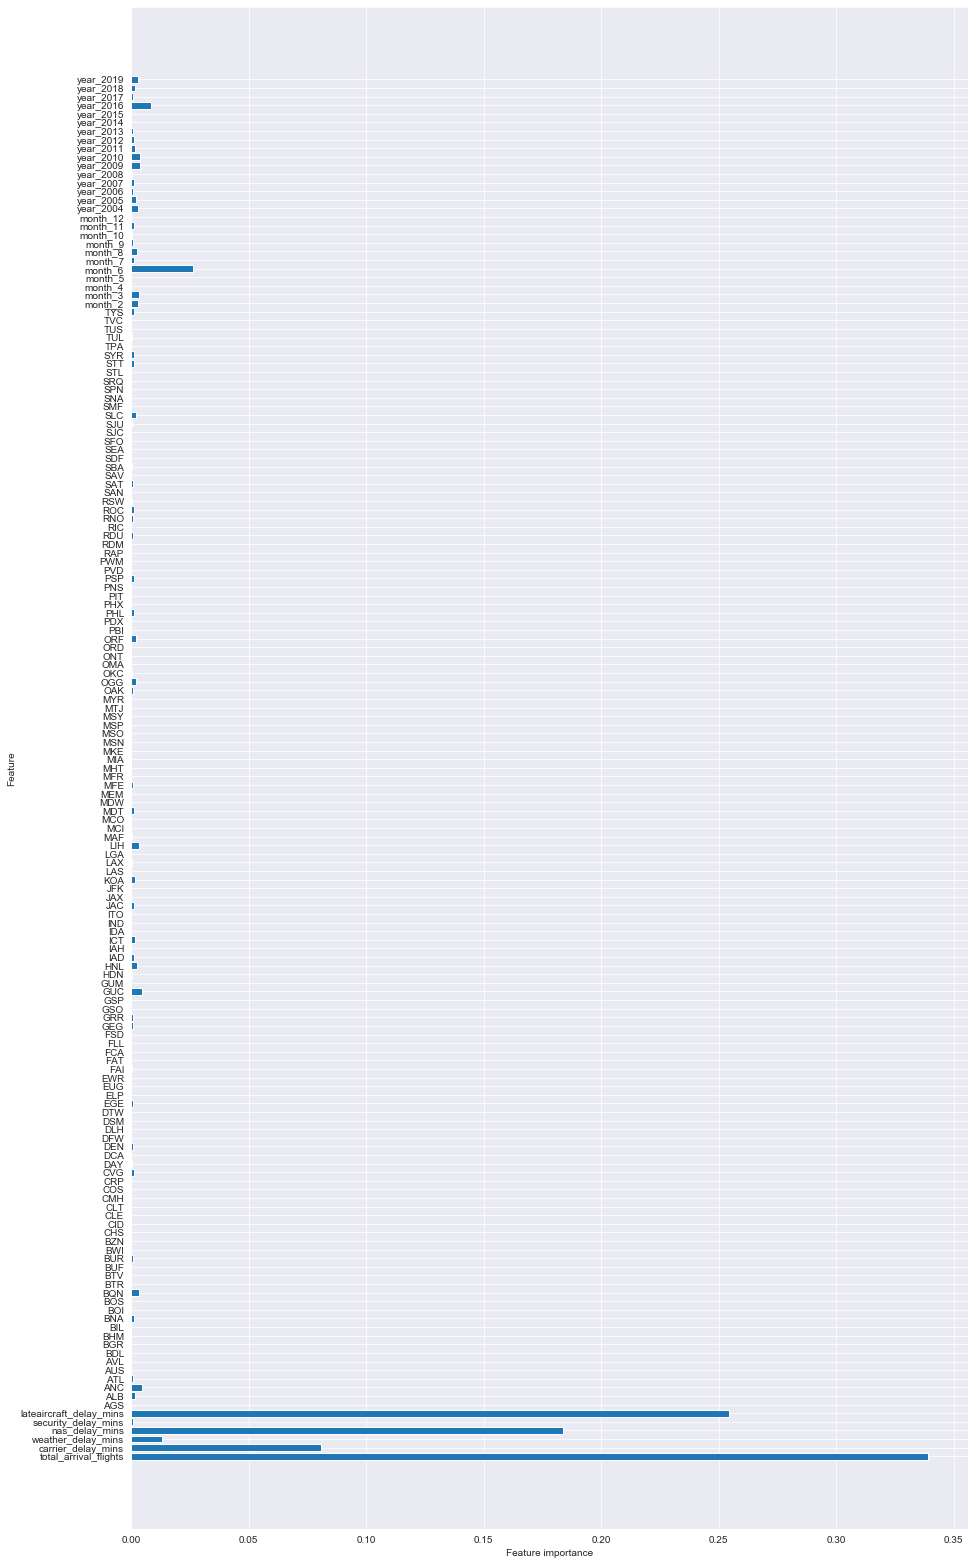

In [113]:
plot_feature_importances(rf_tree_2)

# GridSearch CV

In [590]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time

In [591]:
display(df.describe())

,total_arrival_flights,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,AGS,ALB,ANC,ATL,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
count,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,...,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,502.242339,1638.676777,239.962429,1904.750296,2.576047,2559.122199,0.000312,0.011983,0.009861,0.012170,...,0.054047,0.052986,0.060226,0.059851,0.056544,0.059602,0.065281,0.071397,0.076203,0.052175
std,1159.197257,3702.515469,682.297520,7173.905878,25.889305,5923.270481,0.017663,0.108811,0.098814,0.109648,...,0.226118,0.224013,0.237912,0.237219,0.230976,0.236755,0.247029,0.257495,0.265331,0.222387
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,166.000000,0.000000,75.000000,0.000000,260.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,127.000000,473.000000,42.000000,251.000000,0.000000,789.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.000000,1290.500000,191.000000,923.000000,0.000000,2127.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11055.000000,40363.000000,24442.000000,188994.000000,1161.000000,91633.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [592]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 81.38%


**This model did fine overall, significalntly better than we would expect forom random guessing**

# Hyperparameter Tuning

**1. Combinatoric Grid Searching**

In [710]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)
from pprint import pprint


# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Cross Validation
- Random Hyperparameter Grid

In [639]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(X) for X in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(X) for X in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [640]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


**Random Search Training** and fit it like any Scikit-Learn Model:

- More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [689]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [690]:
clf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

# Evaluate Random Search

In [114]:
base_model = RandomForestClassifier(n_estimators=100,max_depth = 10, random_state = 42)
base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [115]:
trainbase_accscore = base_model.score(X_train, y_train)
trainbase_accscore

0.8106016476658068

In [116]:
testbase_accscore = base_model.score(X_test, y_test)
testbase_accscore

0.7798302546180729

In [117]:
better_model = RandomForestClassifier(n_estimators= 1000, min_samples_split = 2, max_features=1, max_depth=15, bootstrap=False, random_state=38)
better_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=15, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=38, verbose=0,
                       warm_start=False)

In [118]:
trainbetter_accscore = better_model.score(X_train, y_train)
trainbetter_accscore

0.8649413331114255

In [119]:
testbetter_accscore = better_model.score(X_test, y_test)
testbetter_accscore

0.7523714428357464

# Gradient Boosting 

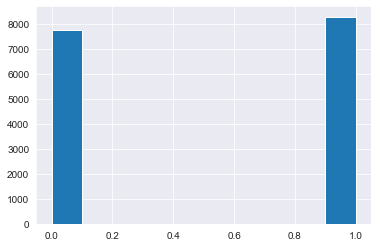

In [121]:
target.hist()

In [122]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [123]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [124]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [125]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8385620371140884
F1-Score: 0.8429658410231504

Model: Gradient Boosted Trees
Accuracy: 0.8909877673296164
F1-Score: 0.8949815616482283

Testing Metrics
Model: AdaBoost
Accuracy: 0.835746380429356
F1-Score: 0.8409090909090909

Model: Gradient Boosted Trees
Accuracy: 0.8731902146779831
F1-Score: 0.8780604896783486


In [126]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[1609,  336],
       [ 322, 1739]])

In [127]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[1669,  276],
       [ 232, 1829]])

In [128]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1945
           1       0.84      0.84      0.84      2061

    accuracy                           0.84      4006
   macro avg       0.84      0.84      0.84      4006
weighted avg       0.84      0.84      0.84      4006



In [129]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1945
           1       0.87      0.89      0.88      2061

    accuracy                           0.87      4006
   macro avg       0.87      0.87      0.87      4006
weighted avg       0.87      0.87      0.87      4006



In [130]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, df, target, cv=3).mean())

Mean Adaboost Cross-Val Score (k=5):
0.6402684991237307


In [131]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, df, target, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.6296581301454305


# XG Boost

In [132]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import xgboost as xgb

In [142]:
labels = target
labels_removed_df = df

In [171]:
X_train, X_test, y_train, y_test = train_test_split(labels_removed_df, labels, test_size = .20, random_state = 42)

In [172]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 89.08%
Validation accuracy: 87.68%


In [173]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [174]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(labels_removed_df, labels)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 250
subsample: 0.7

Training Accuracy: 92.8%
Validation accuracy: 93.35%


# SVM 

In [147]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='rbf', C=0.5) 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 74.05033707618713 seconds


In [148]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[ 192 1752]
 [   4 2058]]
              precision    recall  f1-score   support

           0       0.98      0.10      0.18      1944
           1       0.54      1.00      0.70      2062

    accuracy                           0.56      4006
   macro avg       0.76      0.55      0.44      4006
weighted avg       0.75      0.56      0.45      4006

The accuracy score is 0.5616575137294059


In [149]:
from sklearn.svm import SVC  
tic = time()
svclassifier = SVC(kernel='sigmoid', C=0.5) 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 20.39761781692505 seconds


In [150]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_pred)))

[[ 955  989]
 [1030 1032]]
              precision    recall  f1-score   support

           0       0.48      0.49      0.49      1944
           1       0.51      0.50      0.51      2062

    accuracy                           0.50      4006
   macro avg       0.50      0.50      0.50      4006
weighted avg       0.50      0.50      0.50      4006

The accuracy score is 0.4960059910134798


**Wow this is terrible** 


Move on to Part 2

# In conclusion based on our feature importances we have decided to drop minute delay features. This is highly correlated with our target variable so it can affect our modeling... 

- Check "Evaluating and modeling for next steps!"